In [13]:
! pip install kaggle

In [14]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [15]:
! cp kaggle.json ~/.kaggle/

In [16]:
! chmod 600 ~/.kaggle/kaggle.json

In [17]:
! kaggle datasets download -d alxmamaev/flowers-recognition

 94% 212M/225M [00:03<00:00, 72.0MB/s]
100% 225M/225M [00:03<00:00, 60.6MB/s]


In [18]:
! unzip flowers-recognition.zip

Archive:  flowers-recognition.zip
  inflating: flowers/daisy/100080576_f52e8ee070_n.jpg  
  inflating: flowers/daisy/10140303196_b88d3d6cec.jpg  
  inflating: flowers/daisy/10172379554_b296050f82_n.jpg  
  inflating: flowers/daisy/10172567486_2748826a8b.jpg  
  inflating: flowers/daisy/10172636503_21bededa75_n.jpg  
  inflating: flowers/daisy/102841525_bd6628ae3c.jpg  
  inflating: flowers/daisy/10300722094_28fa978807_n.jpg  
  inflating: flowers/daisy/1031799732_e7f4008c03.jpg  
  inflating: flowers/daisy/10391248763_1d16681106_n.jpg  
  inflating: flowers/daisy/10437754174_22ec990b77_m.jpg  
  inflating: flowers/daisy/10437770546_8bb6f7bdd3_m.jpg  
  inflating: flowers/daisy/10437929963_bc13eebe0c.jpg  
  inflating: flowers/daisy/10466290366_cc72e33532.jpg  
  inflating: flowers/daisy/10466558316_a7198b87e2.jpg  
  inflating: flowers/daisy/10555749515_13a12a026e.jpg  
  inflating: flowers/daisy/10555815624_dc211569b0.jpg  
  inflating: flowers/daisy/10555826524_423eb8bf71_n.jpg  
  i

In [19]:
!pip install -q split-folders

In [20]:
import os
import zipfile
import splitfolders
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import tensorflow as tf
import keras
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

In [21]:
pwd

'/content'

In [22]:
cd /content/flowers

/content/flowers


In [23]:
!ls /content/flowers

daisy  dandelion  rose	sunflower  tulip


In [24]:
# Split the Dataset folders into train test val folders

splitfolders.ratio(input="/content/flowers",output='output',seed=100, ratio=(.8, .1, .1), group_prefix=None)


Copying files: 0 files [00:00, ? files/s]
Copying files: 369 files [00:00, 3681.14 files/s]
Copying files: 784 files [00:00, 3915.94 files/s]
Copying files: 1176 files [00:00, 3745.94 files/s]
Copying files: 1616 files [00:00, 3993.42 files/s]
Copying files: 2017 files [00:00, 3767.86 files/s]
Copying files: 2397 files [00:00, 3567.03 files/s]
Copying files: 2757 files [00:00, 3180.33 files/s]
Copying files: 3083 files [00:00, 2580.09 files/s]
Copying files: 3367 files [00:01, 2642.82 files/s]
Copying files: 3663 files [00:01, 2723.29 files/s]
Copying files: 4317 files [00:01, 3182.27 files/s]


In [25]:
#create paths for folders 

daisy_dir = os.path.join('/content/flowers/daisy')
dandelion_dir = os.path.join('/content/flowers/dandelion')
rose_dir = os.path.join('/content/flowers/rose')
sunflower_dir = os.path.join('/content/flowers/sunflower')
tulip_dir = os.path.join('/content/flowers/tulip')

In [26]:
#count number of files in each directory

print('Total training Daisy images :',len(os.listdir(daisy_dir)))
print('Total training Dandelion images :',len(os.listdir(dandelion_dir)))
print('Total training Rose images :',len(os.listdir(rose_dir)))
print('Total training Sunflower images :',len(os.listdir(sunflower_dir)))
print('Total training Tulip images :',len(os.listdir(tulip_dir)))

Total training Daisy images : 764
Total training Dandelion images : 1052
Total training Rose images : 784
Total training Sunflower images : 733
Total training Tulip images : 984


In [27]:
daisy_files = os.listdir(daisy_dir)
dandelion_files = os.listdir(dandelion_dir)
rose_files = os.listdir(rose_dir)
sunflower_files = os.listdir(sunflower_dir)
tulip_files = os.listdir(tulip_dir)

print("Total len of training images",len(daisy_files+dandelion_files+rose_files+sunflower_files+tulip_files))

Total len of training images 4317


In [28]:
#count of images available in test dataset for each category

print('Total Test Daisy images :',len(os.listdir('output/test/daisy')))
print('Total Test Dandelion images :',len(os.listdir('output/test/dandelion')))
print('Total Test Rose images :',len(os.listdir('output/test/rose')))
print('Total Test Sunflower images :',len(os.listdir('output/test/sunflower')))
print('Total Test Tulip images :',len(os.listdir('output/test/tulip')))

Total Test Daisy images : 77
Total Test Dandelion images : 106
Total Test Rose images : 79
Total Test Sunflower images : 74
Total Test Tulip images : 99


##Visualization

In [29]:
#to plot images get complete paths for images
pic_index = 10

#get paths for some of the immages from each folder
daisy_fewimg = [os.path.join(daisy_dir,fname) for fname in daisy_files[pic_index-10:pic_index]]
dandelion_fewimg = [os.path.join(dandelion_dir,fname) for fname in dandelion_files[pic_index-10:pic_index]]
rose_fewimg = [os.path.join(rose_dir,fname) for fname in rose_files[pic_index-10:pic_index]]
sunflower_fewimg = [os.path.join(sunflower_dir,fname) for fname in sunflower_files[pic_index-10:pic_index]]
tulip_fewimg = [os.path.join(tulip_dir,fname) for fname in tulip_files[pic_index-10:pic_index]]

(342, 500, 3)


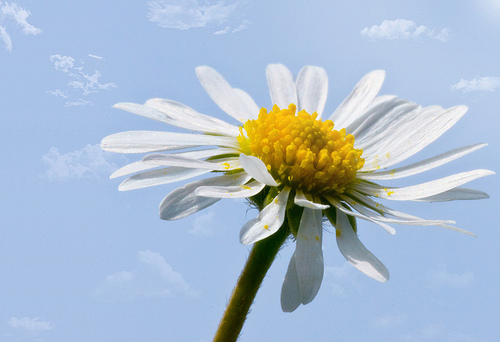

In [30]:
#plot random image 
import PIL.Image as Image

print(cv2.imread(daisy_fewimg[0]).shape)
Image.open(daisy_fewimg[0])

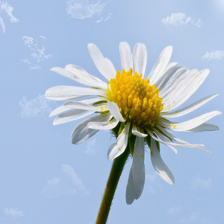

In [31]:
Image.open(daisy_fewimg[0]).resize((224,224))

In [32]:
IMG_ROW = 224
IMG_COL = 224
NUM_CLASSES = 5

In [33]:
#function to convert BGR image to RGB
def cvtRGB(img):
    return cv2.cvtColor(img.copy(), cv2.COLOR_BGR2RGB)

In [34]:
#plot smaple of images function
def plot_img(imgpath_list):

  fig, ax = plt.subplots(3,3,figsize=(10,10))
  k = 0
  for j in range(3):
    for i in range(3):
        img = cv2.resize(cv2.imread(imgpath_list[k]),(224,224))
        k=k+1
        ax[i,j].imshow(cvtRGB(img));
        ax[i,j].axis('off');

				Daisy


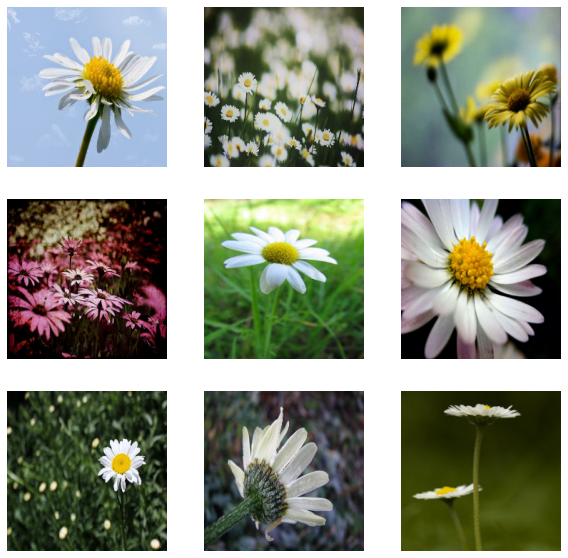

In [35]:
print('\t\t\t\tDaisy')
plot_img(daisy_fewimg)

				Dadelion


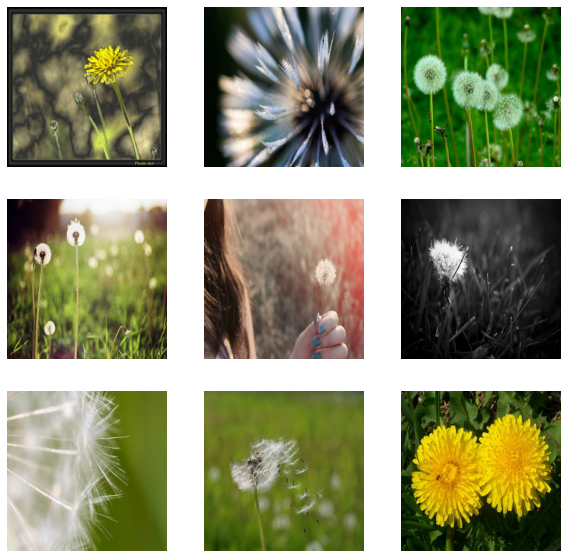

In [36]:
print('\t\t\t\tDadelion')
plot_img(dandelion_fewimg)

				Rose


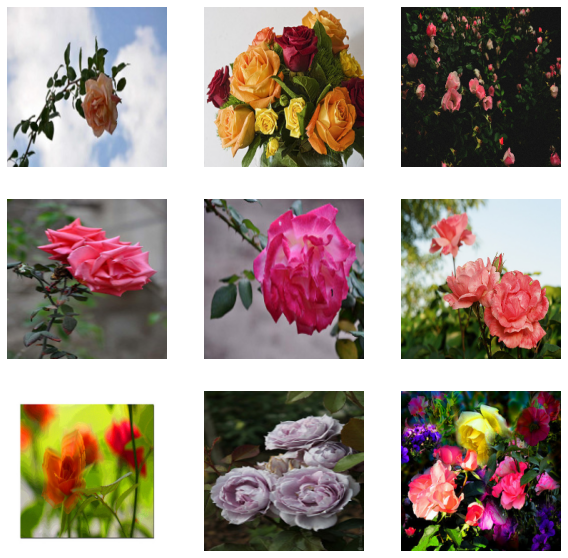

In [37]:
print('\t\t\t\tRose')
plot_img(rose_fewimg)

				Tulip


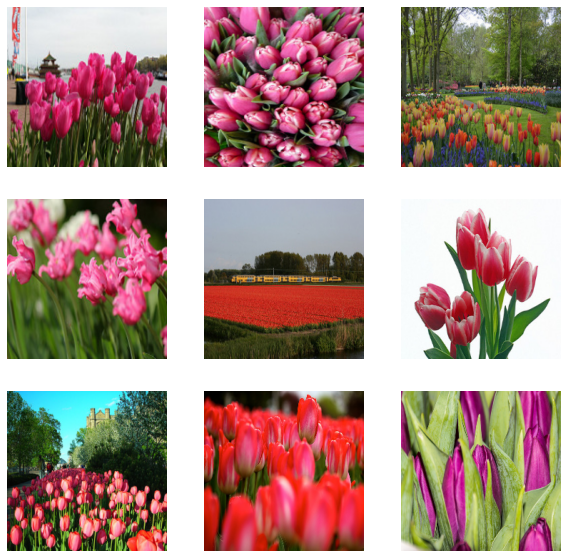

In [38]:
print('\t\t\t\tTulip')
plot_img(tulip_fewimg)

				Sunflower


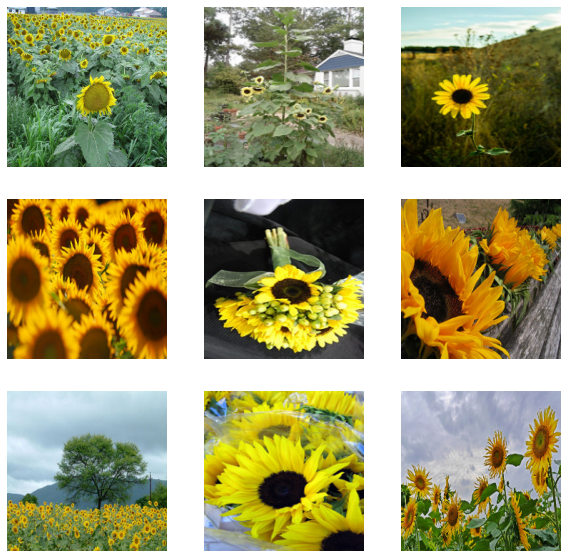

In [39]:
print('\t\t\t\tSunflower')
plot_img(sunflower_fewimg)

##Image Pre-Processing

In [40]:
#image Augumentation using ImageDataGenerator on train data 
#Data augmentation is used to increase the size of training set and to get more different images

training_dir = '/content/flowers/output/train'
training_datagen = ImageDataGenerator(rescale=1/255.0,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

In [41]:
#do not perform augmentation on validation and test data/validation set ,this might mislead the results

validation_dir = "/content/flowers/output/val"
validation_datagen = ImageDataGenerator(rescale=1./255)

In [42]:
test_dir = "/content/flowers/output/test"
test_datagen = ImageDataGenerator(rescale=1./255)

In [43]:
#flow_from_directory() method allows you to read the images directly from the directory and augment them while the neural network model is learning on the training data.

training_set = training_datagen.flow_from_directory(training_dir,target_size=(IMG_ROW,IMG_COL),batch_size=32,class_mode='categorical')
validation_set = validation_datagen.flow_from_directory(validation_dir,target_size=(IMG_ROW,IMG_COL),batch_size=32,class_mode='categorical')
test_set = test_datagen.flow_from_directory(test_dir,target_size=(IMG_ROW,IMG_COL),batch_size=32,class_mode='categorical')

Found 3452 images belonging to 5 classes.
Found 430 images belonging to 5 classes.
Found 435 images belonging to 5 classes.


##Model Building

###VGGNet implementation with Keras

In [44]:
from keras.models import Sequential
from keras.layers import Conv2D, AveragePooling2D, Flatten, Dense, Activation, MaxPool2D, BatchNormalization, Dropout, ZeroPadding2D

###VGG-16

In [45]:
model = Sequential()

# first block
model.add(Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same',input_shape=(224,224, 3)))
model.add(Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

# second block
model.add(Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'))
model.add(Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

# third block
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'))
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'))
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

# forth block
model.add(Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'))
model.add(Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'))
model.add(Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

# fifth block
model.add(Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'))
model.add(Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'))
model.add(Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

# sixth block (classifier)
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(NUM_CLASSES, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 56, 56, 256)       2

In [46]:
OPTIMIZERS = 'adam'
METRICES = ['accuracy']
LOSS_FUN = 'categorical_crossentropy'

model.compile(optimizer=OPTIMIZERS,loss=LOSS_FUN,metrics=METRICES)

In [50]:
EPOCHS = 3
from tensorflow.keras.callbacks import ModelCheckpoint 
checkpoints = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, save_best_only=True)

history1 = model.fit_generator(generator=training_set,epochs=EPOCHS,verbose=2,validation_data=validation_set,callbacks=[checkpoints])

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/3
108/108 - 90s - loss: 1.6005 - accuracy: 0.2433 - val_loss: 1.5990 - val_accuracy: 0.2442

Epoch 00001: val_loss improved from inf to 1.59902, saving model to model.weights.best.hdf5
Epoch 2/3
108/108 - 90s - loss: 1.6007 - accuracy: 0.2370 - val_loss: 1.5984 - val_accuracy: 0.2442

Epoch 00002: val_loss improved from 1.59902 to 1.59837, saving model to model.weights.best.hdf5
Epoch 3/3
108/108 - 90s - loss: 1.5997 - accuracy: 0.2430 - val_loss: 1.5987 - val_accuracy: 0.2442

Epoch 00003: val_loss did not improve from 1.59837


In [51]:
import pandas as pd
pd.DataFrame(history1.history)

loss  accuracy  val_loss  val_accuracy
0  1.600465  0.243337  1.599018      0.244186
1  1.600738  0.236964  1.598374      0.244186
2  1.599680  0.243048  1.598722      0.244186

In [54]:
# load the weights that yielded the best validation accuracy
model.load_weights('model.weights.best.hdf5')

In [62]:
import numpy as np

def get_result(img):
    
    # Read image from path
    image = cv2.imread(img, cv2.IMREAD_COLOR)
    plt.imshow(image)
    
    # Preprocess the image
    img_resized = cv2.resize(image, (224, 224))
    x = np.expand_dims(img_resized, axis=0)
    
    # Load  model
    vgg16_model = model.load_weights('model.weights.best.hdf5')
    
    # Make predictions
    pred = model.predict(x)
    return  pred

array([[0.15603414, 0.14580585, 0.20923   , 0.18954803, 0.29938197]],
      dtype=float32)

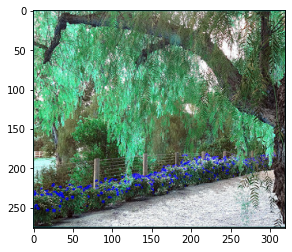

In [63]:
img = '/content/flowers/output/test/rose/11102341464_508d558dfc_n.jpg'
prediction  = get_result(img)
prediction

###VGG19

In [64]:
vgg_19 = Sequential()

# first block
vgg_19.add(Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same',input_shape=(224,224, 3)))
vgg_19.add(Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'))
vgg_19.add(MaxPool2D((2,2), strides=(2,2)))

# second block
vgg_19.add(Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'))
vgg_19.add(Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'))
vgg_19.add(MaxPool2D((2,2), strides=(2,2)))

# third block
vgg_19.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'))
vgg_19.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'))
vgg_19.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'))
vgg_19.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'))
vgg_19.add(MaxPool2D((2,2), strides=(2,2)))

# forth block
vgg_19.add(Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'))
vgg_19.add(Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'))
vgg_19.add(Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'))
vgg_19.add(Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'))
vgg_19.add(MaxPool2D((2,2), strides=(2,2)))

# fifth block
vgg_19.add(Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'))
vgg_19.add(Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'))
vgg_19.add(Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'))
vgg_19.add(Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'))
vgg_19.add(MaxPool2D((2,2), strides=(2,2)))

# seventh block (classifier)
vgg_19.add(Flatten())
vgg_19.add(Dense(4096, activation='relu'))
vgg_19.add(Dropout(0.5))
vgg_19.add(Dense(4096, activation='relu'))
vgg_19.add(Dropout(0.5))
vgg_19.add(Dense(NUM_CLASSES, activation='softmax'))

vgg_19.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 56, 56, 256)      

In [65]:
OPTIMIZERS = 'adam'
METRICES = ['accuracy']
LOSS_FUN = 'categorical_crossentropy'

vgg_19.compile(optimizer=OPTIMIZERS,loss=LOSS_FUN,metrics=METRICES)

In [68]:
EPOCHS = 3
from tensorflow.keras.callbacks import ModelCheckpoint 
checkpoints = ModelCheckpoint(filepath='vgg19_model.weights.best.hdf5', verbose=1, save_best_only=True)

history2 = vgg_19.fit_generator(generator=training_set,epochs=EPOCHS,verbose=2,validation_data=validation_set,callbacks=[checkpoints])

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/3
108/108 - 107s - loss: 1.6207 - accuracy: 0.2323 - val_loss: 1.6011 - val_accuracy: 0.2279

Epoch 00001: val_loss improved from inf to 1.60107, saving model to vgg19_model.weights.best.hdf5
Epoch 2/3
108/108 - 105s - loss: 1.6012 - accuracy: 0.2320 - val_loss: 1.5990 - val_accuracy: 0.2442

Epoch 00002: val_loss improved from 1.60107 to 1.59900, saving model to vgg19_model.weights.best.hdf5
Epoch 3/3
108/108 - 105s - loss: 1.5996 - accuracy: 0.2407 - val_loss: 1.6016 - val_accuracy: 0.2442

Epoch 00003: val_loss did not improve from 1.59900


In [69]:
import pandas as pd
pd.DataFrame(history2.history)

loss  accuracy  val_loss  val_accuracy
0  1.620661  0.232329  1.601067      0.227907
1  1.601179  0.232039  1.599002      0.244186
2  1.599648  0.240730  1.601638      0.244186

In [71]:
# load the weights that yielded the best validation accuracy
vgg_19.load_weights('vgg19_model.weights.best.hdf5')

In [72]:
import numpy as np

def get_result1(img):
    
    # Read image from path
    image = cv2.imread(img, cv2.IMREAD_COLOR)
    plt.imshow(image)
    
    # Preprocess the image
    img_resized = cv2.resize(image, (224, 224))
    x = np.expand_dims(img_resized, axis=0)
    
    # Load  model
    vgg19_model = vgg_19.load_weights('vgg19_model.weights.best.hdf5')
    
    # Make predictions
    pred = vgg_19.predict(x)
    return  pred

Copying files: 0 files [36:30, ? files/s]


array([[0.04775483, 0.00854487, 0.00680998, 0.2672462 , 0.6696441 ]],
      dtype=float32)

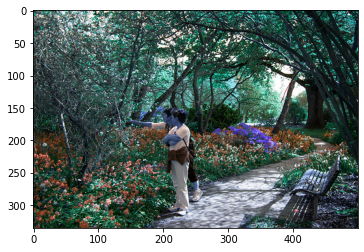

In [73]:
img1 = '/content/flowers/tulip/10094731133_94a942463c.jpg'
prediction1  = get_result1(img1)
prediction1